# Advanced Plotting

by Henry Ngo (2018)

The `results.py` module contains several plotting functions to visualize the results of your `orbitize!` orbit fit. Basic use of these functions are covered in the OFTI and MCMC tutorials. Here, we will examine these plotting functions more deeply. This tutorial will be updated as more features are added to `orbitize!`.

## 1. Test orbit generation with OFTI

In order to have sample data for this tutorial, we will use OFTI to generate some orbits for a published dataset on the GJ 504 system. The following code block is from the OFTI_tutorial ipython notebook, with 10000 orbits generated. Please see that tutorial for details.

**Note: If you have already run this tutorial and saved the computed orbits, you may skip to Section 3 and load up your previously computed orbits instead of running this block below**

In [ ]:
import orbitize.driver
myDriver = orbitize.driver.Driver(
    '../../tests/GJ504.csv', # relative or absolute path to data file
    'OFTI', # name of algorithm for orbit-fitting
    1, # number of secondary bodies in system
    1.22, # total system mass [M_sun]
    56.95, # parallax of system [mas]
    mass_err=0.08, # mass error [M_sun]
    plx_err=0.26 # parallax error [mas]
)
s = myDriver.sampler
orbits = s.run_sampler(10000)

## 2. Creating a Results object with computed orbits

After computing your orbits from either OFTI or MCMC, we store them in a Results object for further analysis and plotting.

In [ ]:
import orbitize.results
myResults = orbitize.results.Results(
    sampler_name = 'OFTI', # name of sampler to be stored in results object
    post = orbits # array of MxN array of orbital parameters (M orbits with N parameters per orbit)
)

It is also useful to save this Results object to a file if we want to load up the same data later without re-computing the orbits

In [ ]:
myResults.save_results('plotting_tutorial_GJ504_results.hdf5')

For more information on the Results object, see below.

In [ ]:
myResults?

Note that you can also add more computed orbits to a results object with `myResults.add_samples()`

In [ ]:
myResults.add_samples?

## 3. (Optional) Load up saved results object

If you are skipping the generation of all orbits because you would rather load from a file that saved the Results object generated above, then execute this block to load it up. Otherwise, skip this block (however, nothing bad will happen if you run it even if you generated orbits above).

In [1]:
import orbitize.results
if 'myResults' in locals():
    del myResults # delete existing Results object 
myResults = orbitize.results.Results() # create empty Results object
myResults.load_results('plotting_tutorial_GJ504_results.hdf5') # load from file

## 4. Using our Results object to make plots

There are currently two plotting functions available: `plot_corner()` makes a corner plot and `plot_orbits()` displays some or all of the computed orbits. Both plotting functions return matplotlib.pyplot.figure objects, which can be displayed, further manipulated with matplotlib.pyplot functions, and saved.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

### 4.1 Corner plots

This function is a wrapper for `corner.py` and creates a display of the 2-D covariances between each pair of parameters as well as histograms for each parameter. These plots are known as "corner plots", "pairs plots", "scatterplot matrix" as well as other names.

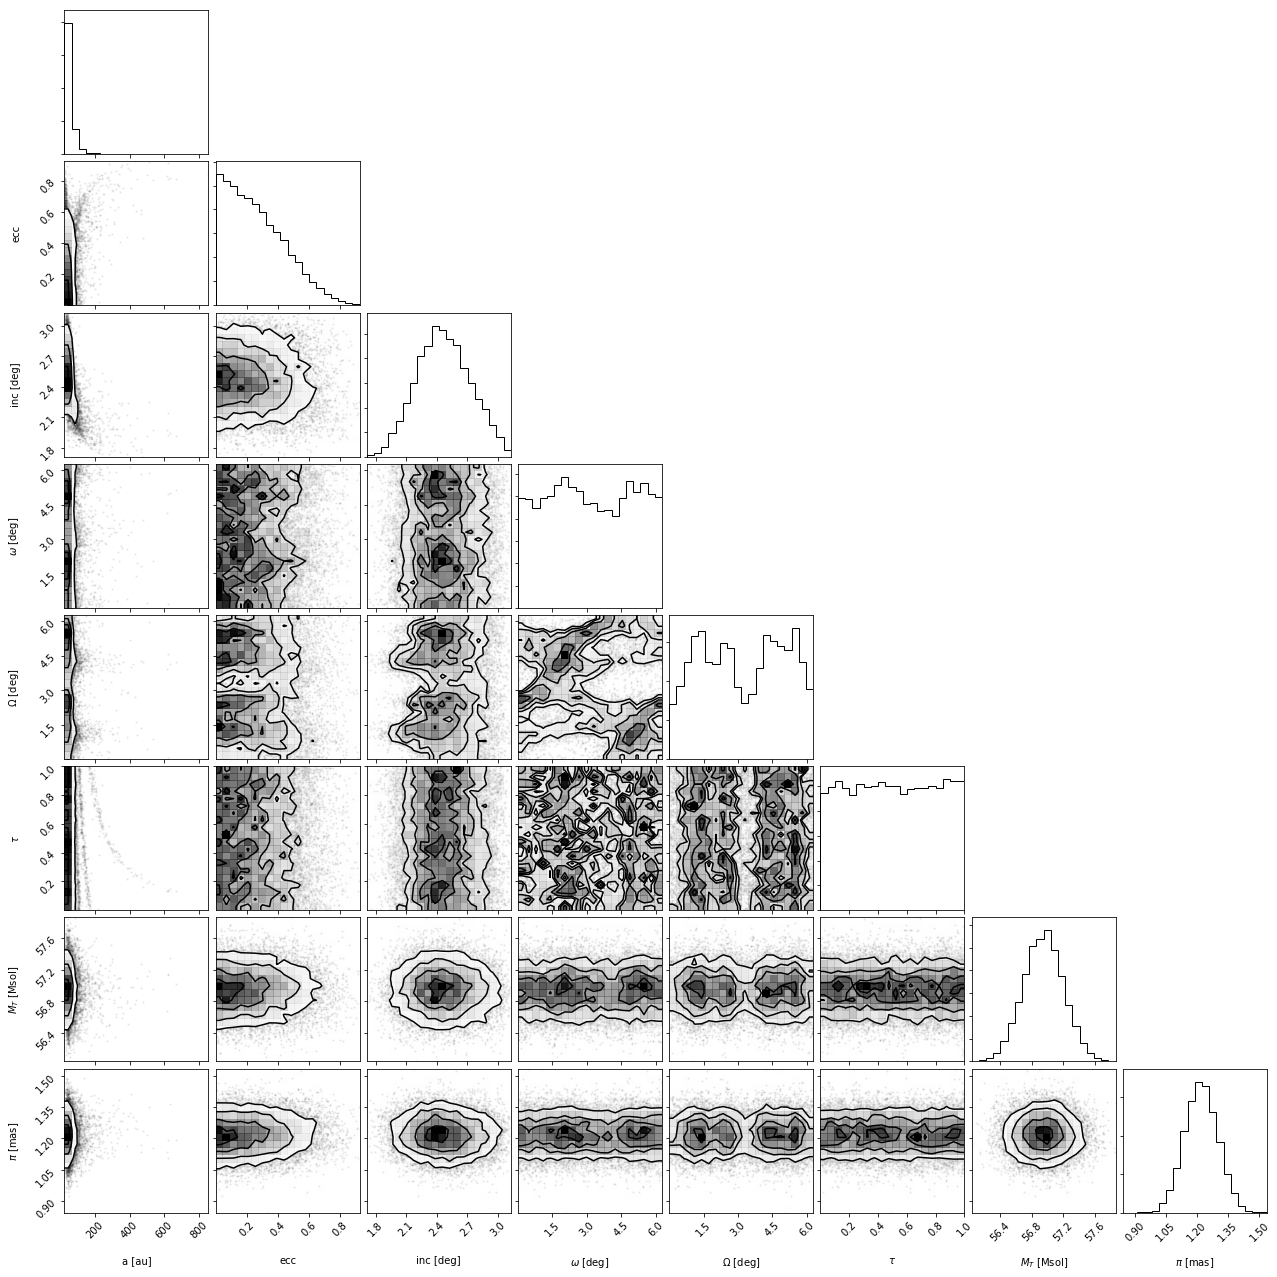

In [3]:
corner_figure = myResults.plot_corner()

#### Choosing which parameters to plot

Sometimes, the full plot with all parameters is not what we want. Let's use the `param_list` keyword argument to plot only semimajor axis, eccentricity and inclination. Here are the possible string labels you can enter for `param_list` and the corresponding orbit fit parameter:

| Label | Parameter name                                                 |
|-------|----------------------------------------------------------------|
| sma1  | semimajor axis                                                 |
| ecc1  | eccentricity                                                   |
| inc1  | inclination                                                    |
| aop1  | argument of periastron                                         |
| pan1  | position angle of nodes <br> (aka longitude of ascending node) |
| epp1  | epoch of periastron passage                                    |
| mtot  | system mass                                                    |
| plx   | system parallax                                                |

Note: for labels with numbers, the number corresponds to the companion (sma1 is the first object's semimajor axis, sma2 would be the second object, etc)

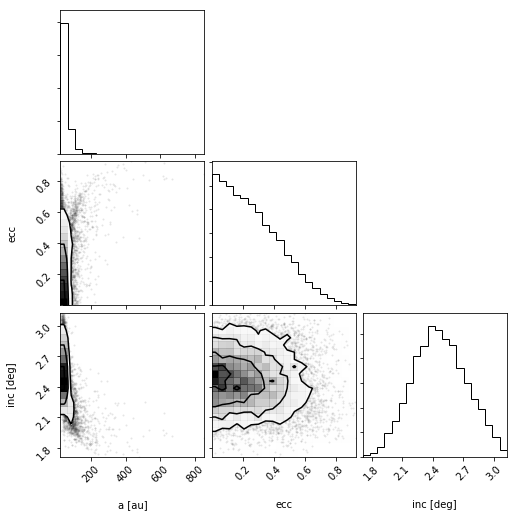

In [5]:
corner_figure = myResults.plot_corner(param_list=['sma1','ecc1','inc1'])

#### Limiting which samples to display

By picking out the panels we show, the plot can be easier to read. But in this case, we see that the plotted x-range on semimajor axis does show the posterior very well. This function will pass on all `corner.corner()` keywords as well. For example, we can use `corner`'s `range` keyword argument to limit the panels to only display 95% of the samples to avoid showing the long tails in the distribution.

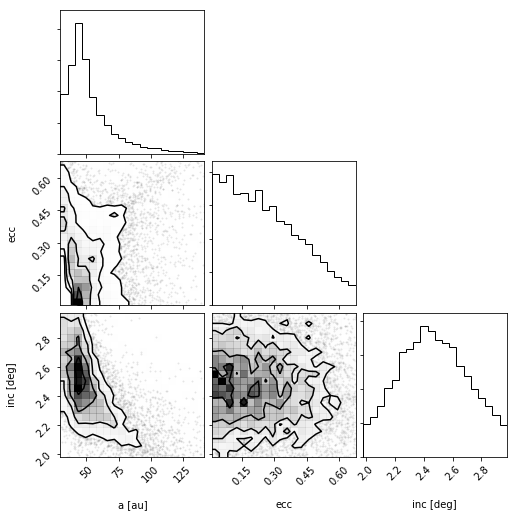

In [7]:
corner_figure = myResults.plot_corner(param_list=['sma1','ecc1','inc1'], range=(0.95,0.95,0.95))

For other keywords you can pass to `corner`, see the `corner.py` [API](https://corner.readthedocs.io/en/latest/api.html "corner.py API").

#### Making single variable histogram plots

One use of the `param_list` keyword is to just plot the histogram for the distribution of one single orbit fit parameter. We can do this by just providing one single parameter.

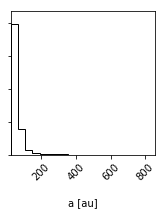

In [8]:
corner_figure = myResults.plot_corner(param_list=['sma1'])

#### Axis label customization

The axis labels seen on the above plots are the default labels that `orbitize` passes to `corner.py` to make these plots. We can override these defaults by passing our own labels through the `labels` keyword parameter as per the `corner.py` [API](https://corner.readthedocs.io/en/latest/api.html "corner.py API"). 

Note that the length of the list of `labels` should match the number of parameters plotted.

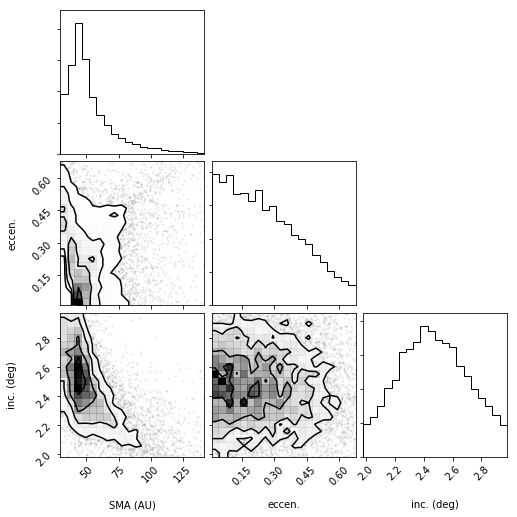

In [11]:
# Corner plot with alternate labels
corner_figure = myResults.plot_corner(
    param_list=['sma1','ecc1','inc1'], 
    range=(0.95,0.95,0.95), 
    labels=('SMA (AU)', 'eccen.', 'inc. (deg)')
)

#### Overplotting best fit ("truth") values

One feature of `corner.py` is to overplot the contours and histograms with a so-called "truth" value, which we can use for many purposes. For example, if we are sampling from a known distribution, we can use it to plot the true value to compare with our samples. Or, we can use it to mark the location of the mean or median of the distribution (the histogram and contours make it easy to pick out the most likely value or peaks of the distribution but maybe not the mean or median). Here is an example of overplotting the median on top of the distribution for the full corner plot.

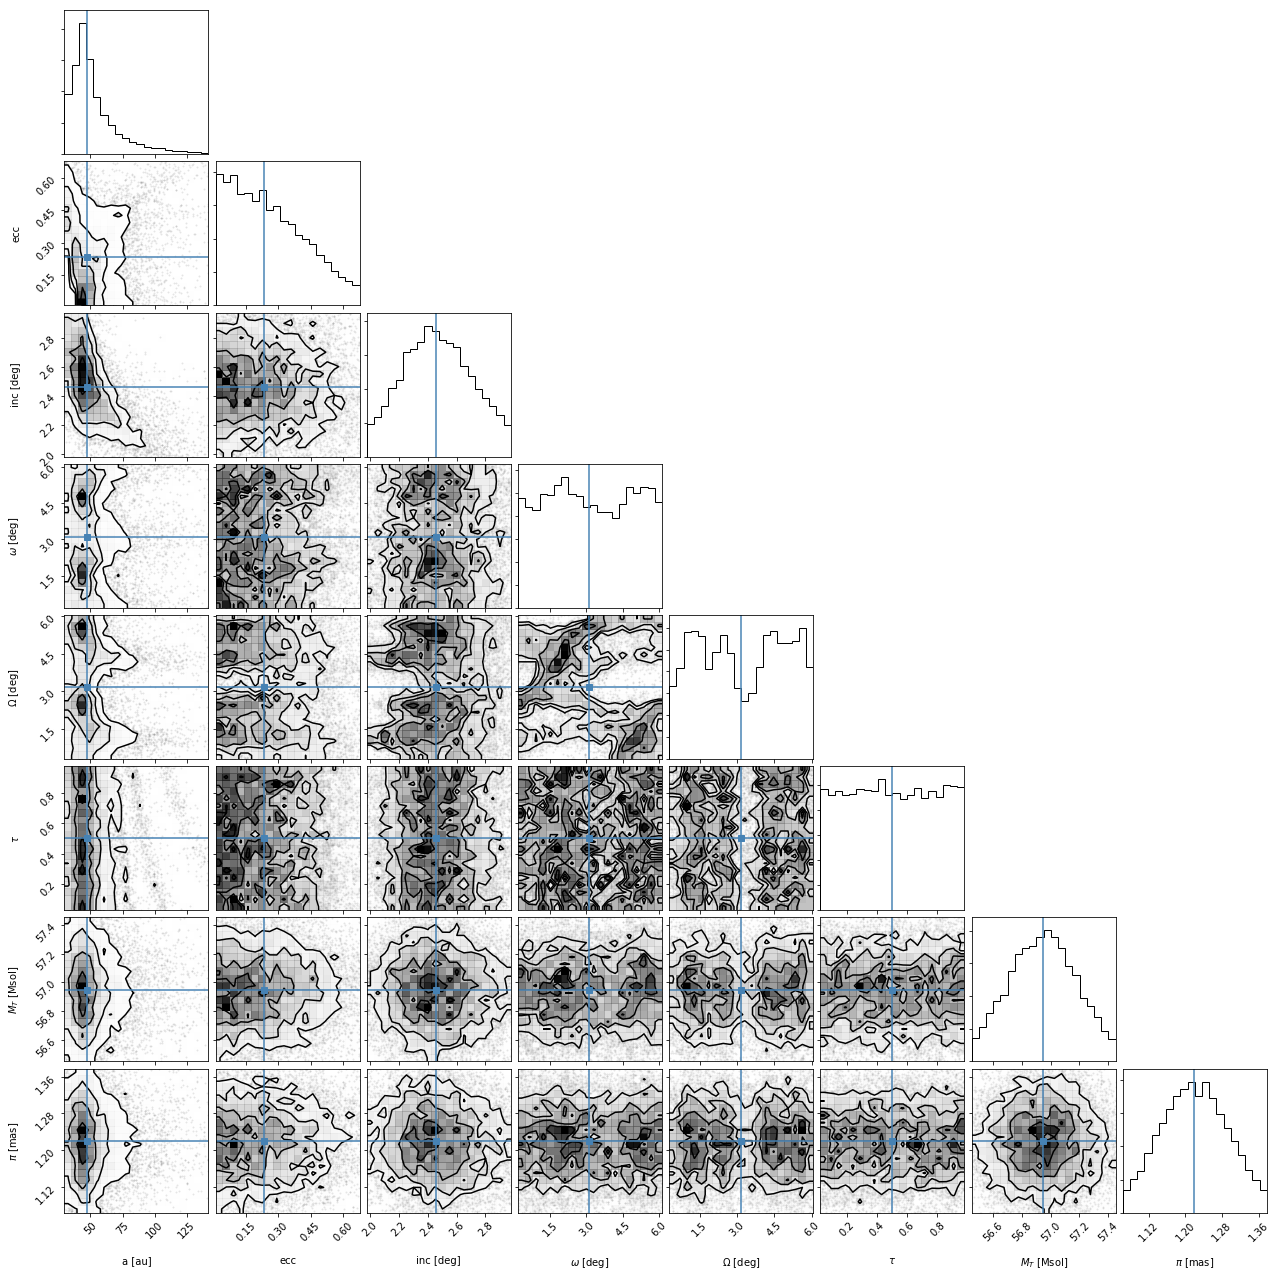

In [20]:
import numpy as np
median_values = np.median(myResults.post,axis=0) # Compute median of each parameter
range_values = np.ones_like(median_values)*0.95 # Plot only 95% range for each parameter
corner_figure = myResults.plot_corner(    
    range=range_values, 
    truths=median_values
)

Overall, we find that some of the parameters have converged well but others are not well constrained by our fit.

### 4.2 Orbit Plot

In [ ]:
orbit_figure = myResults.plot_orbits()